In [32]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
with open('../workload/user-estimate/ANL-Intrepid-2009.json') as f:
    data = json.load(f)

jobs = data['jobs']

In [43]:
jobs[0]

{'id': 0,
 'subtime': 0,
 'walltime': 10800,
 'res': 8,
 'profile': '7568',
 'uid': 1,
 'gid': -1,
 'exe_num': -1,
 'queue': 1}

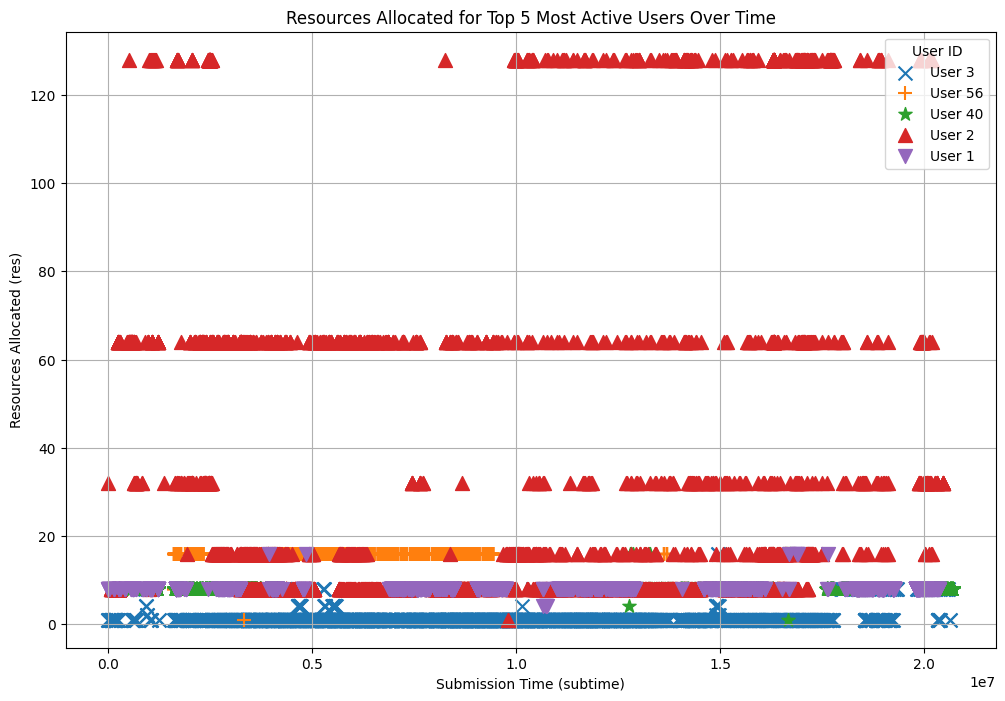

In [44]:
# Extract uid for each job
uids = [job['uid'] for job in data['jobs']]

# Count the number of jobs submitted by each user
user_activity = Counter(uids)

# Identify the top 5 most active users
top_5_users = [user for user, count in user_activity.most_common(5)]

# Define different symbols for each user
symbols = ['x', '+', '*', '^', 'v']  # Cross, Plus, Star, Triangle Up, Triangle Down

# Plotting
plt.figure(figsize=(12, 8))

for i, user in enumerate(top_5_users):
    # Filter jobs for the current user
    user_jobs = [job for job in data['jobs'] if job['uid'] == user]
    
    # Extract subtime and resources for these jobs
    subtimes = [job['subtime'] for job in user_jobs]
    resources = [job['res'] for job in user_jobs]
    
    # Scatter plot for the current user, using different symbols
    plt.scatter(subtimes, resources, marker=symbols[i], label=f'User {user}', s=100)

plt.title('Resources Allocated for Top 5 Most Active Users Over Time')
plt.xlabel('Submission Time (subtime)')
plt.ylabel('Resources Allocated (res)')
plt.legend(title="User ID", loc="upper right")
plt.grid(True)
plt.show()

Linear Regression:
MSE: 44829148.36188091
R2 Score: 0.43837606403996077

Random Forest Regressor:
MSE: 32361400.732241917
R2 Score: 0.5945732204032611


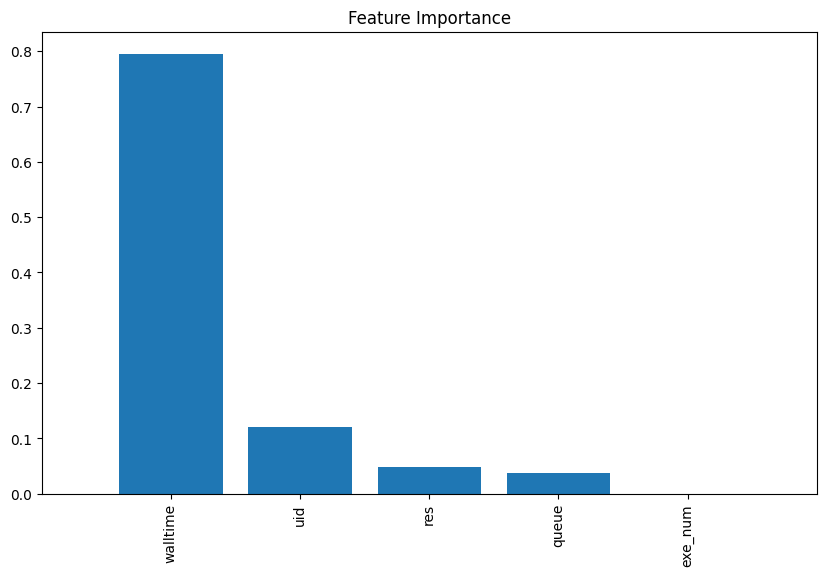

In [45]:
df = pd.DataFrame(data['jobs'])

# Define features and target
X = df[['res', 'walltime', 'exe_num', 'uid', 'queue']]  # Replace 'other_features' with actual feature names
y = df['profile']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Random Forest Regressor Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Models
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))

print("\nRandom Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Plot Feature Importance (for Random Forest)
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()